<a href="https://colab.research.google.com/github/Geriys/VKirillV/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [ ]:
# ваш код тут
# выбрал экспоненциальное распределение  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine cosine_rv = sts.cosine() sample = cosine_rv.rvs(100) sample
expon_rv = sts.expon()
sample = expon_rv.rvs(100)
sample

array([1.95710174e+00, 1.07537489e-01, 6.01521805e-01, 1.21016206e+00,
       1.29024365e+00, 3.76582601e-01, 4.82474690e-01, 2.72137652e-02,
       1.79919773e+00, 4.32658597e-01, 8.67973884e-01, 1.20885692e+00,
       2.78249331e+00, 2.92731701e+00, 6.62050138e-01, 9.64386933e-01,
       3.79564419e+00, 5.44878208e-02, 5.94753153e-01, 3.25689110e-01,
       7.45660703e-02, 2.21462193e+00, 1.82837885e+00, 1.76708165e-01,
       4.06835619e-01, 4.03354327e+00, 1.83839955e-01, 2.52038387e-01,
       2.02246870e+00, 1.35521884e+00, 6.31487145e-01, 1.75417438e-01,
       3.56208568e-02, 4.62965892e-01, 8.82527574e-01, 1.38881916e+00,
       6.15844665e-02, 4.74171853e-02, 1.78324139e-01, 3.58549503e-03,
       2.53065845e-01, 5.19675607e-02, 1.47764509e-01, 2.23098094e-01,
       1.12526512e+00, 8.48515610e-03, 2.77952957e-01, 8.04357985e-01,
       1.14698182e+00, 5.63716930e-01, 1.05540540e+00, 2.36477859e-01,
       6.69887941e-01, 1.08280929e+00, 1.22996399e+00, 6.27676239e-01,
      

In [ ]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины
print(real_mean)

1.0


In [ ]:
real_var = expon_rv.var() # настоящая дисперсия случайной величины
print(real_var)

1.0


### Постройте гистограмму выборки и теоретическую плотность распределения

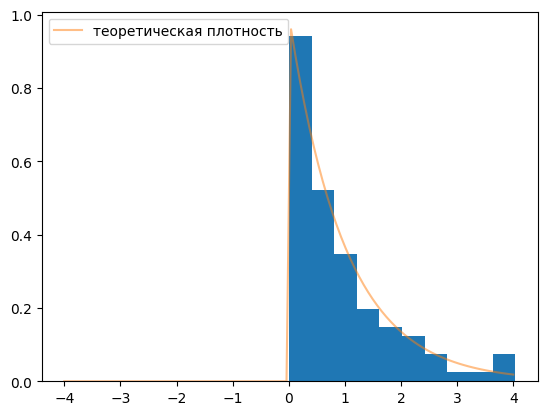

In [ ]:
# ваш код тут (строим)
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [ ]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)

0.9088653533570374


In [ ]:
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.8713897229777915


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

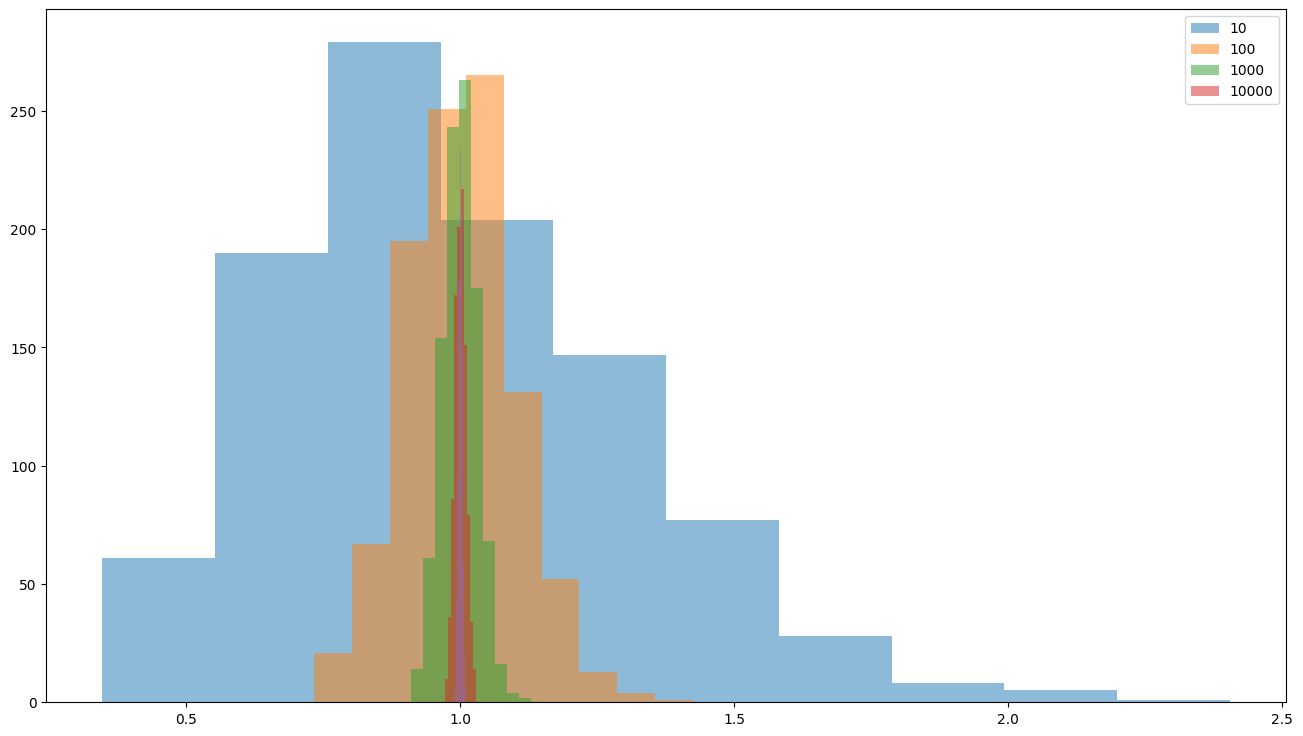

In [ ]:
# ваш код тут
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000, 100000]:
    means = []
    for i in range(1000):
         means.append(np.mean(expon_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [ ]:
#Выбрали среднее значение из выборки в N элементов 1000 раз и построили графики такой выборки с показанием теоретической плотности

[]

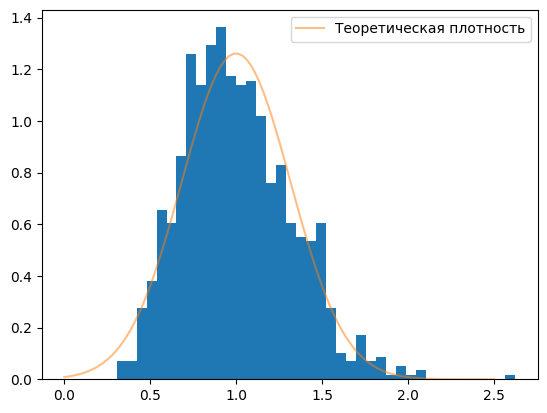

In [ ]:
N = 10
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))

norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0, 2.5, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

[]

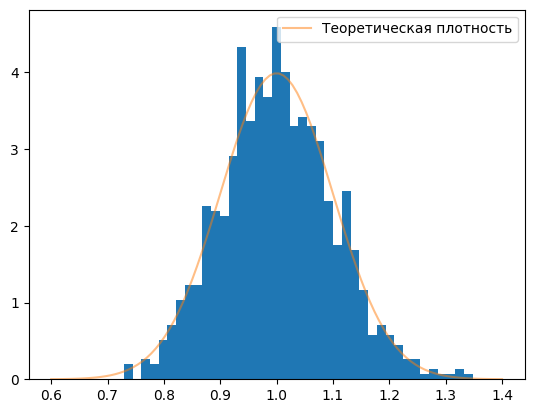

In [ ]:
N = 100
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))

norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.6, 1.4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

[]

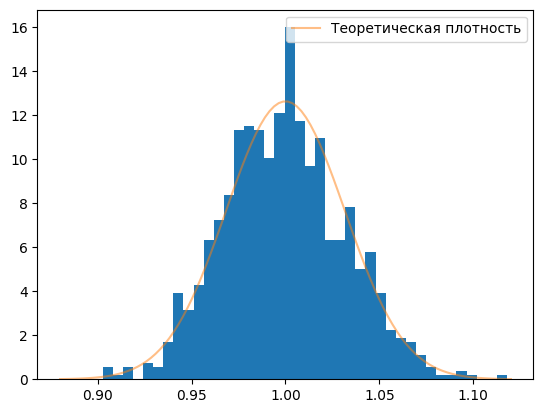

In [ ]:
N = 1000
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))

norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.88, 1.12, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

[]

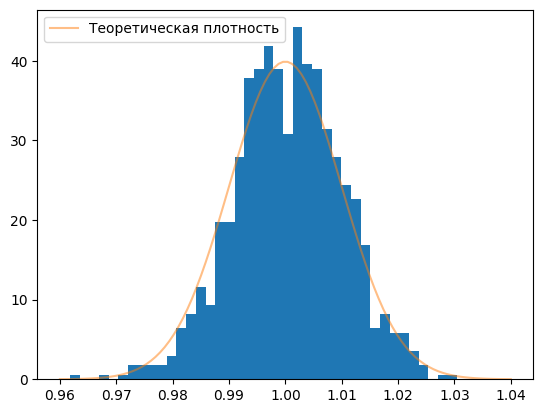

In [ ]:
N = 10000
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))

norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.96, 1.04, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

[]

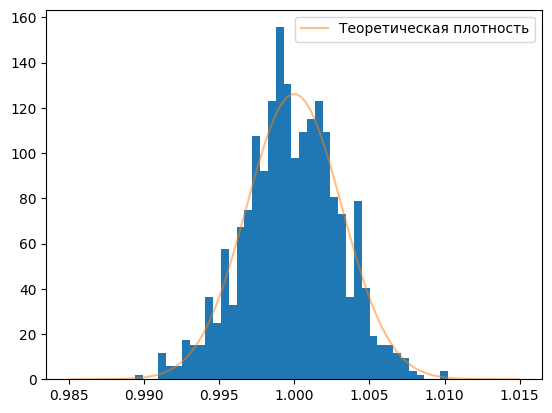

In [ ]:
N = 100000
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))

norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.985, 1.015, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
#На общем графике наглядно видно, что на маленькой выборке (маленьком количестве значений, синий цвет) аппроксимация работает плохо, так как имеется большой разброс.
#Однако на большом количестве выбранных значений (красный цвет) апрроксимация в нашем случае стремится к 1, что соответсвует среднему значению полученному ранее.

In [ ]:
#Ищем значения доверительных интервалов для среднего по ЦПТ разными способами:
for N in [10, 100, 1000, 10000, 100000]:
    print(f"\n\tN = {N}")
    data = expon_rv.rvs(N)
    print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
        np.mean(data) - 1.96 * expon_rv.std() / np.sqrt(N-1), np.mean(data) + 1.96 * expon_rv.std() / np.sqrt(N-1)
    ))
    print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
        sts.norm.interval(0.95, loc=np.mean(data),
                          scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
    ))

    print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
        ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
    ))


	N = 10
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [0.9966972855664702, 2.303363952233137] 
Доверительный интервал для среднего по цпт интервальная оценка: (0.5665491527394702, 2.733512085060137) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (1.546036414557246, 1.754024823242361) 

	N = 100
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [0.6749145270267586, 1.0688893506083696] 
Доверительный интервал для среднего по цпт интервальная оценка: (0.7017675024219759, 1.0420363752131525) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (0.8177422426833363, 0.9260616349517921) 

	N = 1000
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [0.8954912573504761, 1.0195145687954692] 
Доверительный интервал для среднего по цпт интервальная оценка: (0.8975256552147511, 1.0174801709311942) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (0.89685222319041

In [ ]:
#При выборке с малым количеством элементов лучший доверительный интервал, наиболее близкий к настоящему значению мат. ожидания, получается с использованием 3й функции.
#Однако на выборках из большего количества элементов (от 10000), у первой и второй функции показатели получаются более точными.
#При этом, на выборке из 1000 элементов, функции показывают схожие значения.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [2]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [11]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [28]:
#Количество  звонков
cnt = df.groupby('churn')['total day calls'].count()
cnt

churn
False    2850
True      483
Name: total day calls, dtype: int64

In [29]:
cnt1, cnt2 = cnt
print(cnt1, cnt2)

2850 483


In [6]:
#
#df['total day calls'].mean()

100.43564356435644

In [7]:
#
#df['total day calls'].var()

402.76814091973426

In [19]:
#Средние значения по total day calls с разбиении по колонке churn (ушел/не ушел).
avg = df.groupby('churn')['total day calls'].mean()
avg

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

In [20]:
avg1, avg2 = avg
print(avg1, avg2)

100.28315789473685 101.33540372670808


In [22]:
#Значения дисперсии по total day calls с разбиении по колонке churn (ушел/не ушел).
varr = df.groupby('churn')['total day calls'].var(ddof=1)
varr

churn
False    392.085817
True     465.795985
Name: total day calls, dtype: float64

In [26]:
varr1, varr2 = varr
print(varr1, varr2)

392.08581663002695 465.79598463957115


In [55]:
#Ищем значения доверительных интервалов для среднего по ЦПТ разными способами для значений false:
print("Доверительный интервал для среднего по цпт интервальная оценка, соответсвенно для звонков false: {} ".format(
        sts.norm.interval(0.95, loc=np.mean(avg1),
                          scale=np.std(avg, ddof=1)/np.sqrt(cnt1-1)) # alternative 'two-sided' only
    ))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
        ssw._zconfint_generic(np.mean(avg1), np.std(avg, ddof=1), alpha=0.95, alternative='two-sided')
    ))

Доверительный интервал для среднего по цпт интервальная оценка, соответсвенно для звонков false: (100.25583642345548, 100.31047936601821) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (100.23650090637055, 100.32981488310314) 


In [57]:
#Ищем значения доверительных интервалов для среднего по ЦПТ разными способами для значений true:
print("Доверительный интервал для среднего по цпт интервальная оценка, соответсвенно для звонков true: {} ".format(
        sts.norm.interval(0.95, loc=np.mean(avg2),
                          scale=np.std(avg, ddof=1)/np.sqrt(cnt2-1)) # alternative 'two-sided' only
    ))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
        ssw._zconfint_generic(np.mean(avg2), np.std(avg, ddof=1), alpha=0.95, alternative='two-sided')
    ))

Доверительный интервал для среднего по цпт интервальная оценка, соответсвенно для звонков true: (101.26897945701589, 101.40182799640027) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (101.28874673834179, 101.38206071507437) 
